In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import gmaps
import requests
import json

In [34]:
#Original Draft Data

master_data = pd.read_csv("../Draft-Research/starting file/Draft_SD_CSV.csv")

#Creating WAR Group column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
#Only showing draft classes that have had players debut before 2014

working_data = master_data.loc[master_data["Year"] < 2005]

#Draft classes that are still going on

ongoing_data = master_data.loc[master_data["Year"] >= 2005]

#Only includes signed draftees

signing_data = working_data.loc[working_data["Signed"] == "Y"]

#Only includes MLB players

MLB_player_data = working_data[pd.notnull(working_data["playerID"])]

#Only MLB players that signed

signed_MLB_players = MLB_player_data.loc[MLB_player_data["Signed"] == "Y"]

#Grouped by drafting franchise

grouped_by_franchise = signing_data.groupby("Franchise")

#Grouped by year and team

grouped_by_year_team = signing_data.groupby(["Year", "Tm"])

In [36]:
#Find the number of MLB players in each draft class

MLB_count = working_data.groupby("Year")["playerID"].count()

MLB_count

Year
1965    138
1966    104
1967     85
1968    103
1969    125
1970    101
1971    102
1972    123
1973    101
1974    117
1975    109
1976    123
1977    129
1978    144
1979    141
1980    128
1981    135
1982    156
1983    126
1984    121
1985    150
1986    175
1987    220
1988    195
1989    185
1990    235
1991    209
1992    208
1993    206
1994    214
1995    203
1996    208
1997    208
1998    196
1999    190
2000    203
2001    208
2002    209
2003    223
2004    203
Name: playerID, dtype: int64

In [37]:
#Total WAR by draft class year

draft_class_war = working_data.groupby("Year")["Total_WAR"].sum()

draft_class_war

Year
1965    511.6
1966    379.9
1967    415.7
1968    397.1
1969    445.5
1970    332.1
1971    339.1
1972    538.9
1973    442.8
1974    411.7
1975    317.0
1976    487.1
1977    404.4
1978    596.5
1979    480.3
1980    369.0
1981    665.1
1982    695.6
1983    467.6
1984    385.9
1985    540.7
1986    539.0
1987    613.2
1988    594.1
1989    596.0
1990    504.6
1991    535.2
1992    522.4
1993    466.4
1994    541.9
1995    590.4
1996    564.5
1997    529.5
1998    657.7
1999    614.4
2000    656.8
2001    654.6
2002    737.1
2003    559.9
2004    597.3
Name: Total_WAR, dtype: float64

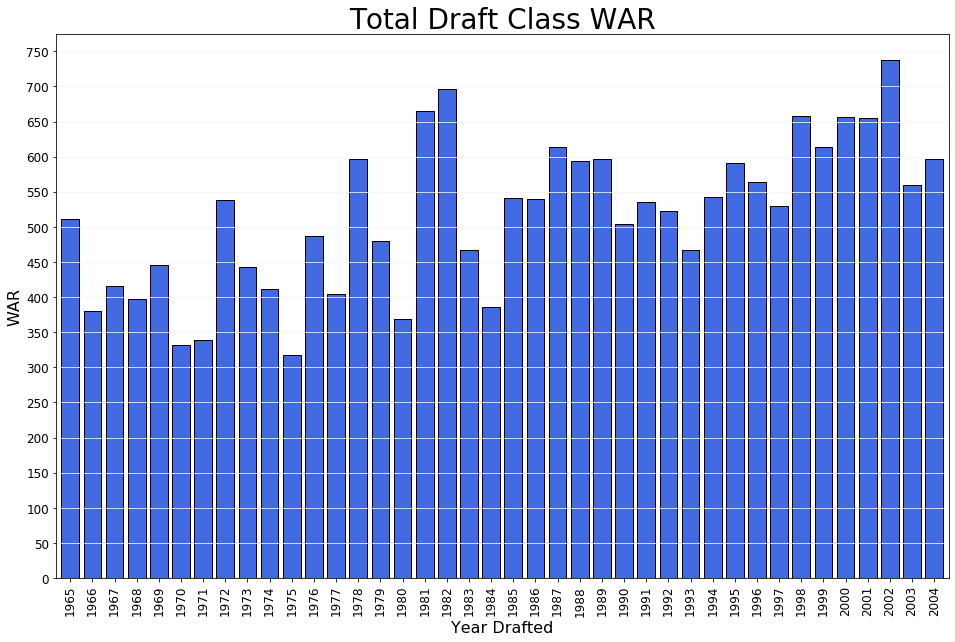

In [38]:
#WAR by draft class year bargraph

draft_class_war.plot(kind = "bar", color = "royalblue", width = .8, fontsize = 12, edgecolor = "black", figsize = (16, 10))
plt.title("Total Draft Class WAR", size = 28)
plt.xlabel("Year Drafted", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(0, 800, step = 50))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("MLB Players by Draft Year.png")
plt.show()

In [39]:
#Draft class summary statistics

MLB_count.describe()

count     40.000000
mean     161.475000
std       45.072015
min       85.000000
25%      123.000000
50%      153.000000
75%      206.500000
max      235.000000
Name: playerID, dtype: float64

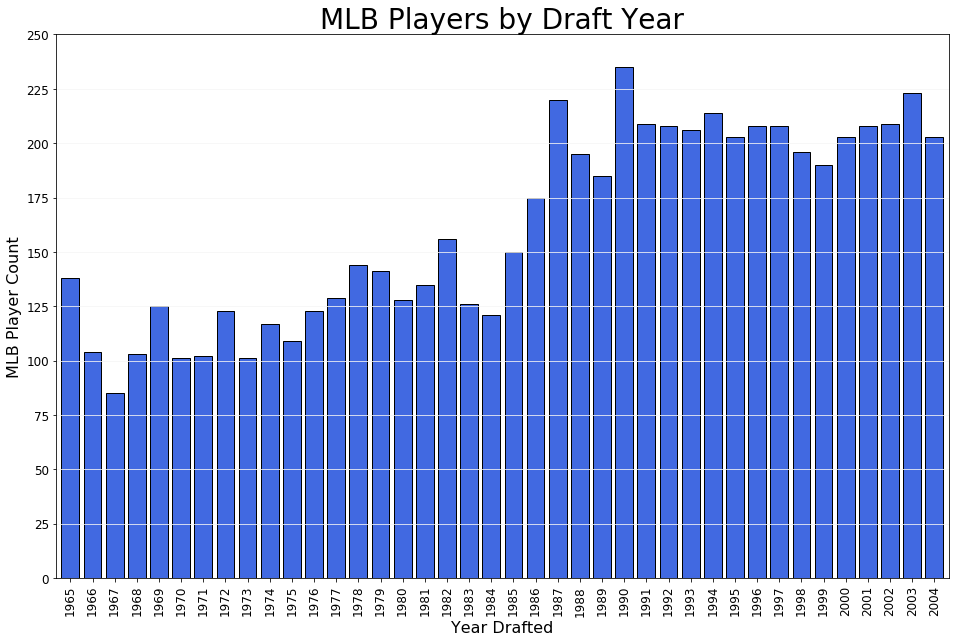

In [40]:
#Player by draft class year bargraph

MLB_count.plot(kind = "bar", color = "royalblue", width = .8, fontsize = 12, edgecolor = "black", figsize = (16, 10))
plt.title("MLB Players by Draft Year", size = 28)
plt.xlabel("Year Drafted", size = 16)
plt.ylabel("MLB Player Count", size = 16)
plt.yticks(np.arange(0, 251, step = 25))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("MLB Players by Draft Year.png")
plt.show()

In [41]:
#Create a table by year and WAR groups

draft_year_war_table = pd.crosstab(working_data["Year"], working_data["WAR Group"])
draft_year_war_table = draft_year_war_table[["No Major League Experience", "Less than 5 WAR", "10-15 WAR", 
"15-20 WAR", "20-25 WAR", "More than 25 WAR"]]

#draft_year_war_table

draft_year_war_table

WAR Group,No Major League Experience,Less than 5 WAR,10-15 WAR,15-20 WAR,20-25 WAR,More than 25 WAR
Year,,,,,,
1965,686,108,7,5,2,5
1966,727,76,6,3,2,2
1967,890,60,8,5,2,4
1968,809,74,7,7,1,1
1969,917,98,5,8,2,2
1970,826,80,6,5,0,3
1971,699,83,2,0,2,5
1972,668,90,8,7,5,4
1973,646,71,4,7,3,3


In [42]:
#Summary statistics by WAR group

draft_year_war_table.describe()

WAR Group,No Major League Experience,Less than 5 WAR,10-15 WAR,15-20 WAR,20-25 WAR,More than 25 WAR
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,980.875000,127.250000,8.375000,5.075000,3.125000,3.150000
std,325.866591,39.936328,3.371734,1.992132,1.897198,1.687815
min,570.000000,60.000000,2.000000,0.000000,0.000000,0.000000
25%,695.750000,93.000000,6.000000,3.750000,2.000000,2.000000
50%,858.000000,113.000000,8.000000,5.500000,3.000000,3.000000
75%,1274.000000,165.500000,10.000000,7.000000,4.250000,4.000000
max,1530.000000,198.000000,21.000000,8.000000,9.000000,8.000000


In [43]:
#Creating a table by year and school type for MLB players

draft_year_school_table = pd.crosstab(MLB_player_data["Year"], MLB_player_data["Type"])

draft_year_school_table

Type,4Yr,HS,JC
Year,,,
1965,53,77,7
1966,37,58,9
1967,5,77,3
1968,29,67,5
1969,34,82,9
1970,27,70,4
1971,20,79,3
1972,36,79,8
1973,35,58,8


In [44]:
# Summary statistics of Major Leaguers in the draft for each school type

draft_year_school_table.describe()

Type,4Yr,HS,JC
count,40.000000,40.000000,40.000000
mean,73.850000,71.025000,15.900000
std,29.149966,15.066498,12.751672
min,5.000000,35.000000,1.000000
25%,51.250000,58.000000,4.000000
50%,79.000000,71.000000,9.000000
75%,94.250000,82.250000,29.250000
max,110.000000,103.000000,38.000000


In [45]:
#Creating the same table but with percentages for year instead of count

draft_year_school_table_college = draft_year_school_table["4Yr"]
draft_year_school_table_hs = draft_year_school_table["HS"]
draft_year_school_table_juco = draft_year_school_table["JC"]

draft_year_school_table_college_pct = 100 * round(draft_year_school_table_college / 
(draft_year_school_table_college + draft_year_school_table_hs + draft_year_school_table_juco),3)

draft_year_school_table_hs_pct = 100 * round(draft_year_school_table_hs / 
(draft_year_school_table_college + draft_year_school_table_hs + draft_year_school_table_juco),3)

draft_year_school_table_juco_pct = 100 * round(draft_year_school_table_juco / 
(draft_year_school_table_college + draft_year_school_table_hs + draft_year_school_table_juco),3)

draft_year_school_table_pct = pd.DataFrame({"College %" : draft_year_school_table_college_pct,
                                            "High School %" : draft_year_school_table_hs_pct,
                                           "Juco %" : draft_year_school_table_juco_pct})
draft_year_school_table_pct

,College %,High School %,Juco %
Year,,,
1965,38.7,56.2,5.1
1966,35.6,55.8,8.7
1967,5.9,90.6,3.5
1968,28.7,66.3,5.0
1969,27.2,65.6,7.2
1970,26.7,69.3,4.0
1971,19.6,77.5,2.9
1972,29.3,64.2,6.5
1973,34.7,57.4,7.9


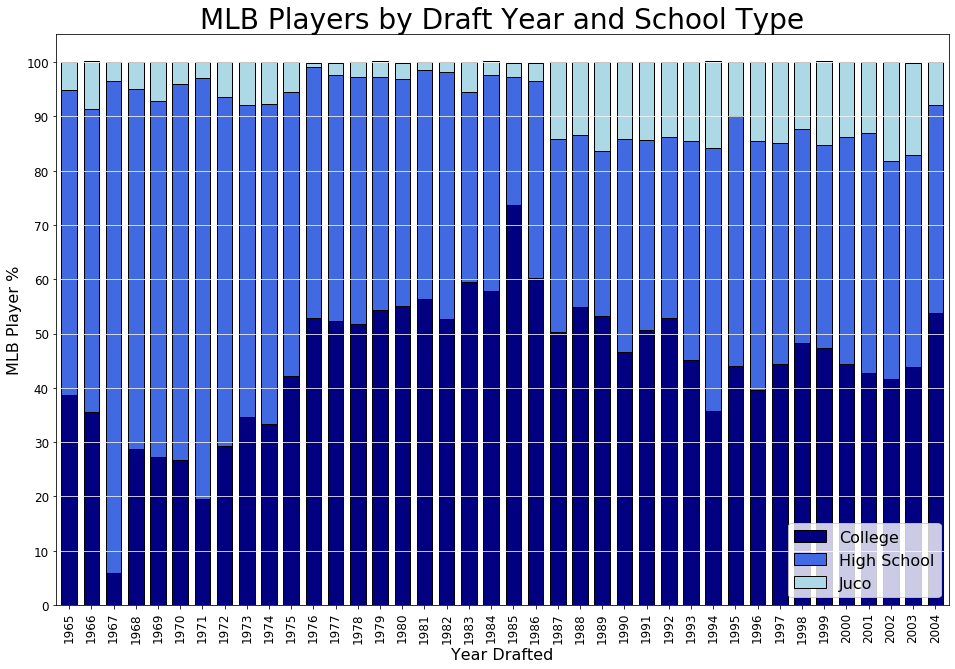

In [46]:
colors = ["navy", "royalblue", "lightblue"]

draft_year_school_table_pct.plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "black", stacked = True, figsize = (16, 10.5))
plt.title("MLB Players by Draft Year and School Type", size = 28)
plt.xlabel("Year Drafted", size = 16)
plt.ylabel("MLB Player %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("MLB Players School Type by Draft Year.png")
plt.show()

In [47]:
#Used to find which franchises have drafted the best historically

franchise_WAR_overall = grouped_by_franchise["Total_WAR"].sum()

franchise_drafts = grouped_by_franchise["Year"].nunique()

avg_franchise_WAR = franchise_WAR_overall / franchise_drafts

avg_franchise_WAR.sort_values(ascending = False)

Franchise
Rays                   20.255556
Red Sox                19.017500
Rockies                18.176923
Athletics              18.022500
Cardinals              17.765000
Blue Jays              16.996429
Diamondbacks           16.222222
Angels                 15.877500
Royals                 15.867568
Mariners               15.303571
Nationals              15.197297
Twins                  15.055000
Reds                   15.020000
Rangers                14.547500
Phillies               14.520000
Pirates                14.447500
Mets                   13.745000
Brewers                13.556757
Braves                 13.415000
Yankees                13.340000
Dodgers                13.230000
Astros                 13.052500
Cubs                   12.675000
Tigers                 12.215000
White Sox              12.175000
Indians                11.855000
Orioles                11.675000
Giants                 11.605000
Padres                 11.091892
Marlins                10.769231


In [48]:
#Finding the total WAR drafted and signed for each team every year

teamWAR = grouped_by_year_team["Total_WAR"].sum()

print(teamWAR.sort_values(ascending = False))

teamWAR.to_csv("output data/yearly_team_draft_results.csv")

Year  Tm       
1976  Red Sox      79.1
1999  Cardinals    76.0
1989  Twins        75.4
1981  Mariners     71.3
1989  Red Sox      71.1
                   ... 
1983  Mariners     -3.3
1973  Braves       -3.5
1974  Cubs         -3.5
1987  Phillies     -5.4
1999  Pirates      -5.7
Name: Total_WAR, Length: 1053, dtype: float64
